# Naive echo state

For now in script form, not even an object

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import echo

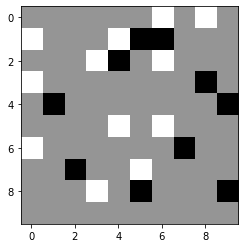

In [57]:
# Connectivity
def init(n=20, p_edge=0.3, p_inhib=0.5):
    """Create a connectivity matrix"""
    w = np.floor(np.random.random((n,n)) + p_edge)*(np.floor(np.random.random((n,n))+0.5)*2-1)
    for i in range(n): w[i,i] = 0 # Remove diagonal
    return w

w = init(10)
plt.imshow(w, cmap='Greys');

In [96]:
def center(x):
    """Unbias and normalize the signal."""
    y = x - np.mean(x, axis=0)
    y = y/np.std(y, axis=0)
    return y

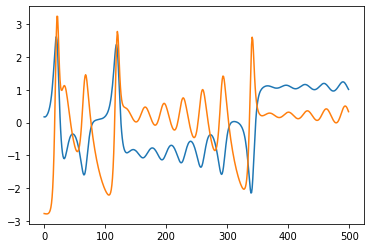

In [95]:
# Data
data = center(echo.lorenz(500, t=10))
plt.plot(data[:,0]);
plt.plot(data[:,2]);

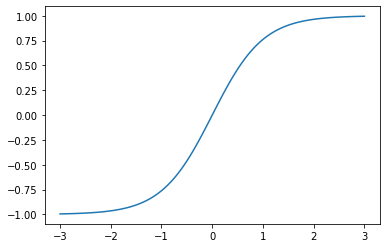

In [79]:
# Activation function
def activation(x, a=2):
    """Sigmoid activation function."""
    #return -1/(1+np.exp(x*a))+0.5
    return np.tanh(x)

x = np.linspace(-3,3,100)
plt.plot(x, activation(x));

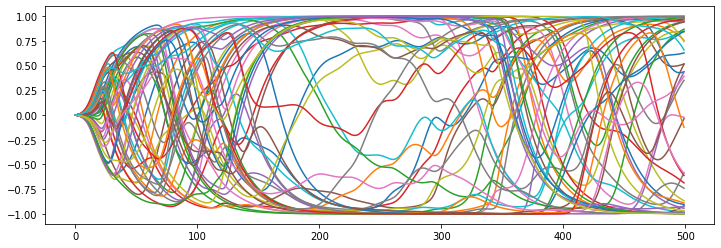

In [212]:
# Creation and Main loop
n_t = 500
n = 50
alpha = 0.05
decay = 0.95

#data = center(echo.lorenz(n_t, t=10))
data = echo.lorenz(n_t, t=10)/20
w = init(n)
state = np.zeros((n_t, n))
comb = (np.arange(n) % 2)*2 - 1     # A sequence of alternating +1 and -1s
for i in range(1,n_t):
    state[i,:] = state[i-1,:]*decay + alpha*activation((w @ state[i-1, :]) + comb*data[i,0])
    
plt.figure(figsize=(12,4));
plt.plot(state);

(480, 50)
(480, 1)
(1, 50)


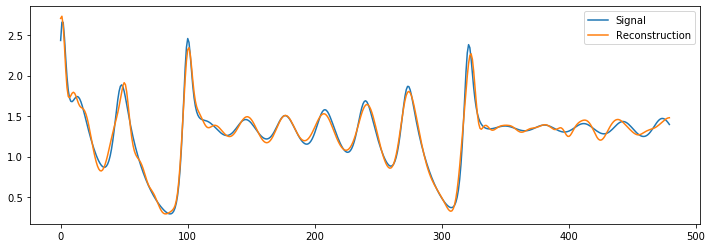

In [213]:
# Linear fit

skip = 20
x = state[skip:,:]
y = data[skip:,2]

#xhat = np.vstack((x, np.ones(x.shape))).T
y = y[..., np.newaxis]
print(x.shape)
print(y.shape)

th = (y.T @ x) @ np.linalg.pinv(x.T @ x)
print(th.shape)

plt.figure(figsize=(12,4))
plt.plot(y, label='Signal');
plt.plot(x @ th.T, label='Reconstruction')
plt.legend();

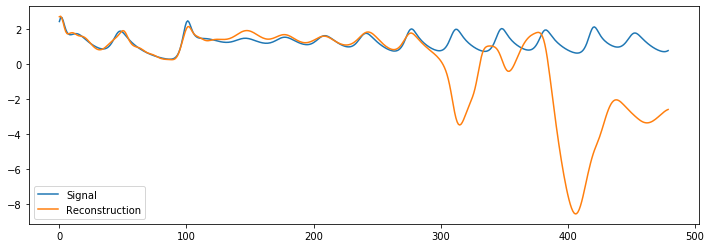

In [217]:
# Test
# Reused variables from above: w, comb, alpha, decay

data = echo.lorenz(n_t, t=10, start=(1,0,1.01))/20
state = np.zeros((n_t, n))
for i in range(1,n_t):
    state[i,:] = state[i-1,:]*decay + alpha*activation((w @ state[i-1, :]) + comb*data[i,0])
    
plt.figure(figsize=(12,4))
plt.plot(data[skip:,2], label='Signal');
plt.plot(state[skip:,:] @ th.T, label='Reconstruction')
plt.legend();

That's the divergence folks, right here :)